In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils

/home/dl-box/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# load the iris dataset

In [2]:
iris = datasets.load_iris()
#check what the input data means
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
#load input data and scale range
data = preprocessing.scale(iris.data)

#load ouput labels
label = iris.target
label = np_utils.to_categorical(label)

print(data.shape,label.shape)

(150, 4) (150, 3)


In [4]:
#train test split
train_X, test_X, train_y, test_y = train_test_split(data, label, train_size=0.8,random_state=3)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


/home/dl-box/anaconda3/envs/keras/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# load mlp model with trained weights that classifies the input data into 3 classes

In [6]:
from kwb.models import iris_mlp

In [8]:
model = iris_mlp()

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
firstlayer (Dense)           (None, 8)                 40        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
secondlayer (Dense)          (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
prepredictions (Dense)       (None, 3)                 27        
__________

In [10]:
print(model.evaluate(train_X,train_y))
print(model.evaluate(test_X,test_y))
#output indicates loss and accuracy, respectively.

120/120 [==============================] - 0s 1ms/step
[0.06792142714063326, 0.9666666666666667]
30/30 [==============================] - 0s 60us/step
[0.05477446690201759, 0.9666666388511658]


In [11]:
#lets use the first data of test_X (test_X[0]) for visualization
print(test_X[0])
print(test_y[0],np.argmax(test_y[0])) #true label,

print(model.predict(test_X[0:1]),np.argmax(model.predict(test_X[0:1]))) #predicted label


[-1.50652052  0.33784833 -1.3412724  -1.31297673]
[1. 0. 0.] 0
[[9.9971217e-01 2.8768831e-04 6.4823887e-08]] 0


# visualizing intermediate output of MLP

In [ ]:
from kwb.attention_map import i

In [12]:
intout = intermediate_output(model,test_X[0],"firstlayer",visualize=True,
                             row=6,col=6,cmap="Reds")
intout = intermediate_output(model,test_X[0],"secondlayer",visualize=True,
                             row=6,col=6,cmap="Reds")

intout = intermediate_output(model,test_X[0],"prepredictions",visualize=True,
                             row=6,col=6,cmap="Reds")


NameError: name 'kwb' is not defined

# Visualize the importance of input data by guided backpropagation 

<BarContainer object of 4 artists>

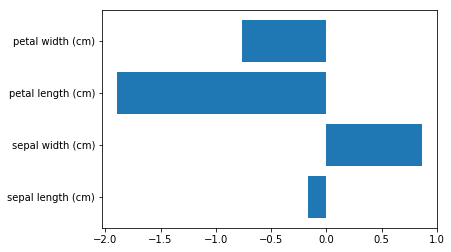

In [12]:
gmodel = kwb.utils.build_guided_model(model)
gb = kwb.utils.guided_backprop(gmodel,test_X[0],"prepredictions",normalize="raw")
plt.barh(iris.feature_names,gb)

#by comparing the absolute values of each column, the contribution to the classification is
#ordered by petal length, sepal width, and petal width. And can interpret that sepal length has the least impact
#upon classification